# Introduction

This notebook contains an implementation of TemporalDifferenceLambda and a naive implementation of MonteCarlo method for evaluation of a simple policy of a simple MDP.

# MDP

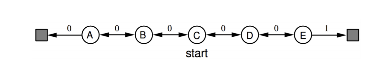

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

%matplotlib inline

mdp = Image.open('./mdp.PNG', 'r')
plt.axis('off')
plt.imshow(mdp)

In [2]:
import numpy as np
import random

#Montecarlo
def model_free_prediction_mc(num_states = 5, num_episodes = 10000, learning_rate=None):

    state_values = np.zeros((num_states,))
    state_occurences = np.zeros((num_states,))
    for episode in range(num_episodes):
        # Start at mid
        location = (num_states + 1)//2
        reward = 0
        # Terminate at End
        visited_states = []
        while location > 0 and location < num_states + 1:
            # Add curr location to visited states
            visited_states.append(location)
            # Generate action based on policy (left: -1, right: 1)
            action = -1 if random.randint(0, 1) else 1
            # Apply action (change location)
            location += action
        reward = 0 if not location else 1
        # Update states based on reward using Montecarlo
        lr = learning_rate
        for idx, state in enumerate(visited_states):
            state_occurences[state - 1] += 1
            if not learning_rate:
                lr = 1.0 / state_occurences[state - 1]
            state_values[state - 1] = state_values[state - 1] + lr * (reward - state_values[state - 1])
        tenth = np.ceil(num_episodes / 10)
        if episode%tenth == 0:
            print(episode)
    print(episode)
        
    return state_values, state_occurences

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
9999
[ 0.17613927  0.34773273  0.51507053  0.68140422  0.84246714]


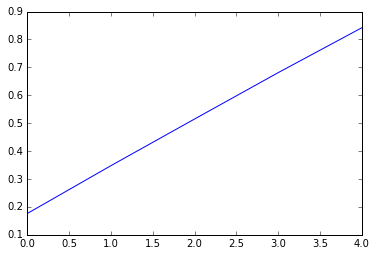

In [3]:
mc_values = model_free_prediction_mc()[0]
print(mc_values)
plt.plot(range(5), mc_values)

In [4]:
def td_lambda_forward_view(num_states = 5, num_episodes = 10000, learning_rate=None, decay=1.0, Y=1.0, debug=False):

    state_values = np.zeros((num_states+2,))
    state_occurences = np.zeros((num_states,))
    episode_tenth = np.ceil(num_episodes / 10)
    for episode in range(num_episodes):
        # Start at mid
        state = (num_states + 1)//2
        # Terminate at End
        visited_states = []
        rewards = []
        while state > 0 and state < num_states + 1:
            # Increment occurences of curr state
            state_occurences[state - 1] += 1
            
            # Generate action based on policy (left: -1, right: 1)
            action = -1 if random.randint(0, 1) else 1
            
            # Calc next state St+1
            next_state = state + action
            
            # Calc instant reward(St, At)
            reward = 1 if next_state == num_states + 1 else 0
            rewards.append(reward)
            
            # Save curr state
            visited_states.append(state)
            
            # Update state
            state = next_state
                
        G_lambda = np.zeros((len(visited_states),))
        # Calc G for all states
        for j in range(len(visited_states) - 1):
            curr_lambda = 1
            for i in range(len(visited_states) - 1 - j):
                G = np.sum(rewards[j : j + i + 1]) + state_values[visited_states[j + i + 1]]
                G_lambda[j] += curr_lambda * (1 - Y) * G
                curr_lambda *= Y
            G_lambda[j] += curr_lambda * np.sum(rewards[j:])
        G_lambda[j + 1] = rewards[j + 1]
                
        # Update Value Function TD
        for idx, state in enumerate(visited_states):    
            #V(St) = V(St) + lr * (G_lambda(t) - V(St))
            lr = learning_rate
            if not learning_rate:
                lr = 1.0 / state_occurences[state - 1]
            state_values[state] = state_values[state] + lr * (G_lambda[idx] - state_values[state])
            
        if episode % episode_tenth == 0:
            print(episode)
    print(episode)
        
    return state_values[1:-1], state_occurences

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
9999
[ 0.17230529  0.33652796  0.50025093  0.66782145  0.83844721]


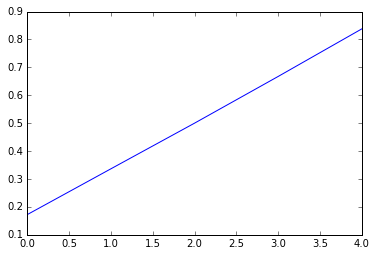

In [5]:
td_lambda_values = td_lambda_forward_view()[0]
print(td_lambda_values)
plt.plot(range(5), td_lambda_values)